In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
import datetime

pd.reset_option('^display.', silent=True)

In [3]:
data_s=pd.DataFrame(pd.read_json('data\db_stanley.json'))
data_s["df_owner"] = "stanley"
data_r=pd.DataFrame(pd.read_json('data\db_raka.json'))
data_r["df_owner"] = "raka"
data_y=pd.DataFrame(pd.read_json('data\db_yannik.json'))
data_y["df_owner"] = "yannik"

In [4]:
data_s=data_s.sort_values(by='timestamp', ascending=True)
data_s=data_s.where(data_s['duration']==900)
data_s=data_s.drop(labels='duration', axis=1)
data_r=data_r.sort_values(by='timestamp', ascending=True)
data_r=data_r.where(data_r['duration']==900)
data_r=data_r.drop(labels='duration', axis=1)
data_y=data_y.sort_values(by='timestamp', ascending=True)
data_y=data_y.where(data_y['duration']==900)
data_y=data_y.drop(labels='duration', axis=1)


dataset=pd.concat([data_s, data_r, data_y])

Analysis of http requests

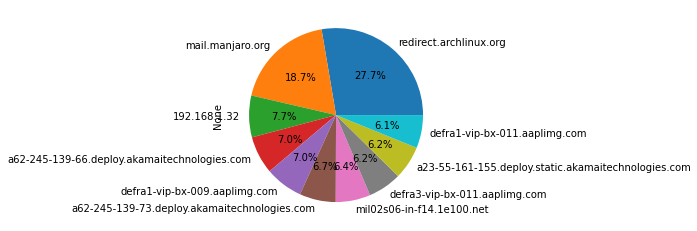

In [62]:
http=dataset['http_using']
http_list=[]
length=len(http)

for i in range(length) :
    http_list=http_list + http.iloc[i]

s_http=pd.Series(http_list)
http_count=s_http.value_counts()
http_count=http_count.head(10)
http_count.plot(kind='pie',autopct="%1.1f%%")
title='Percentage of recorded http requests - top15 results'

Retrieving the information from the dataset needed for the IPv4 / IPv6 comparison from each person(performance is the reason for not doing that on a whole dataset)


In [6]:
ipdata_s=data_s.drop(labels={"http_using","df_owner"},axis=1)
ipdata_s['acc_count']=0
ipdata_s['acc_size']=0
ipdata_s['num_devices']=0
ipdata_s["acc_in_ipv6"]=0
ipdata_s["acc_out_ipv6"]=0
ipdata_s["acc_out_ipv4"]=0
ipdata_s["acc_in_ipv4"]=0
for record in range(ipdata_s.shape[0]) :
    #transposing the single entry so that rows represent different devices
    stamp=pd.DataFrame(ipdata_s.iloc[record]['devices']).transpose()
    num_devices=stamp.shape[0]
    ipdata_s.at[record, 'num_devices']=num_devices
    for device in range(num_devices):
        ipdata_s.at[record,'acc_count']+=stamp.iloc[device]['total_count']
        ipdata_s.at[record,'acc_size']+=stamp.iloc[device]['total_size']
    for device in range(num_devices):
        device_name=stamp.iloc[device].name
        ipdata_s.at[record,(device_name +"_perc_out_ipv4")]=stamp.iloc[device]['total_out_ipv4_count']/stamp.iloc[device]['total_count']
        ipdata_s.at[record,(device_name +"_perc_in_ipv4")]=stamp.iloc[device]['total_in_ipv4_count']/stamp.iloc[device]['total_count']
        ipdata_s.at[record,("acc_in_ipv4")]+=stamp.iloc[device]['total_in_ipv4_count']
        ipdata_s.at[record,("acc_out_ipv4")]+=stamp.iloc[device]['total_out_ipv4_count']
        ipdata_s.at[record,(device_name +"_perc_out_ipv6")]=stamp.iloc[device]['total_out_ipv6_count']/stamp.iloc[device]['total_count']
        ipdata_s.at[record,(device_name +"_perc_in_ipv6")]=stamp.iloc[device]['total_in_ipv6_count']/stamp.iloc[device]['total_count']
        ipdata_s.at[record,("acc_in_ipv6")]+=stamp.iloc[device]['total_in_ipv6_count']
        ipdata_s.at[record,("acc_out_ipv6")]+=stamp.iloc[device]['total_out_ipv6_count']
    del stamp

In [7]:
ipdata_r=data_r.drop(labels={"http_using","df_owner"},axis=1)
ipdata_r['acc_count']=0
ipdata_r['acc_size']=0
ipdata_r['num_devices']=0
ipdata_r["acc_in_ipv6"]=0
ipdata_r["acc_out_ipv6"]=0
ipdata_r["acc_out_ipv4"]=0
ipdata_r["acc_in_ipv4"]=0
for record in range(ipdata_r.shape[0]) :
    #transposing the single entry so that rows represent different devices
    stamp=pd.DataFrame(ipdata_r.iloc[record]['devices']).transpose()
    num_devices=stamp.shape[0]
    ipdata_r.at[record, 'num_devices']=num_devices
    for device in range(num_devices):
        ipdata_r.at[record,'acc_count']+=stamp.iloc[device]['total_count']
        ipdata_r.at[record,'acc_size']+=stamp.iloc[device]['total_size']
    for device in range(num_devices):
        device_name=stamp.iloc[device].name
        ipdata_r.at[record,(device_name +"_perc_out_ipv4")]=stamp.iloc[device]['total_out_ipv4_count']/stamp.iloc[device]['total_count']
        ipdata_r.at[record,(device_name +"_perc_in_ipv4")]=stamp.iloc[device]['total_in_ipv4_count']/stamp.iloc[device]['total_count']
        ipdata_r.at[record,("acc_in_ipv4")]+=stamp.iloc[device]['total_in_ipv4_count']
        ipdata_r.at[record,("acc_out_ipv4")]+=stamp.iloc[device]['total_out_ipv4_count']
        ipdata_r.at[record,(device_name +"_perc_out_ipv6")]=stamp.iloc[device]['total_out_ipv6_count']/stamp.iloc[device]['total_count']
        ipdata_r.at[record,(device_name +"_perc_in_ipv6")]=stamp.iloc[device]['total_in_ipv6_count']/stamp.iloc[device]['total_count']
        ipdata_r.at[record,("acc_in_ipv6")]+=stamp.iloc[device]['total_in_ipv6_count']
        ipdata_r.at[record,("acc_out_ipv6")]+=stamp.iloc[device]['total_out_ipv6_count']
    del stamp

In [8]:
ipdata_y=data_y.drop(labels={"http_using","df_owner"},axis=1)
ipdata_y['acc_count']=0
ipdata_y['acc_size']=0
ipdata_y['num_devices']=0
ipdata_y["acc_in_ipv6"]=0
ipdata_y["acc_out_ipv6"]=0
ipdata_y["acc_out_ipv4"]=0
ipdata_y["acc_in_ipv4"]=0
for record in range(ipdata_y.shape[0]) :
    #transposing the single entry so that rows represent different devices
    stamp=pd.DataFrame(ipdata_y.iloc[record]['devices']).transpose()
    num_devices=stamp.shape[0]
    ipdata_y.at[record, 'num_devices']=num_devices
    for device in range(num_devices):
        ipdata_y.at[record,'acc_count']+=stamp.iloc[device]['total_count']
        ipdata_y.at[record,'acc_size']+=stamp.iloc[device]['total_size']
    for device in range(num_devices):
        device_name=stamp.iloc[device].name
        ipdata_y.at[record,(device_name +"_perc_out_ipv4")]=stamp.iloc[device]['total_out_ipv4_count']/stamp.iloc[device]['total_count']
        ipdata_y.at[record,(device_name +"_perc_in_ipv4")]=stamp.iloc[device]['total_in_ipv4_count']/stamp.iloc[device]['total_count']
        ipdata_y.at[record,("acc_in_ipv4")]+=stamp.iloc[device]['total_in_ipv4_count']
        ipdata_y.at[record,("acc_out_ipv4")]+=stamp.iloc[device]['total_out_ipv4_count']
        ipdata_y.at[record,(device_name +"_perc_out_ipv6")]=stamp.iloc[device]['total_out_ipv6_count']/stamp.iloc[device]['total_count']
        ipdata_y.at[record,(device_name +"_perc_in_ipv6")]=stamp.iloc[device]['total_in_ipv6_count']/stamp.iloc[device]['total_count']
        ipdata_y.at[record,("acc_in_ipv6")]+=stamp.iloc[device]['total_in_ipv6_count']
        ipdata_y.at[record,("acc_out_ipv6")]+=stamp.iloc[device]['total_out_ipv6_count']
    del stamp

This data will be used for the IPv4/IPv6 statistics visualized in google sheets


In [9]:
s_packets=np.sum(ipdata_s['acc_count'])
s_perc_in_ipv4=np.sum(ipdata_s['acc_in_ipv4'])/ s_packets
s_perc_out_ipv4=np.sum(ipdata_s['acc_out_ipv4'])/ s_packets
s_perc_in_ipv6=np.sum(ipdata_s['acc_in_ipv6'])/ s_packets
s_perc_out_ipv6=np.sum(ipdata_s['acc_out_ipv6'])/ s_packets


r_packets=np.sum(ipdata_r['acc_count'])
r_perc_in_ipv4=np.sum(ipdata_r['acc_in_ipv4'])/ r_packets
r_perc_out_ipv4=np.sum(ipdata_r['acc_out_ipv4'])/ r_packets
r_perc_in_ipv6=np.sum(ipdata_r['acc_in_ipv6'])/ r_packets
r_perc_out_ipv6=np.sum(ipdata_r['acc_out_ipv6'])/ r_packets


y_packets=np.sum(ipdata_y['acc_count'])
y_perc_in_ipv4=np.sum(ipdata_y['acc_in_ipv4'])/ y_packets
y_perc_out_ipv4=np.sum(ipdata_y['acc_out_ipv4'])/ y_packets
y_perc_in_ipv6=np.sum(ipdata_y['acc_in_ipv6'])/ y_packets
y_perc_out_ipv6=np.sum(ipdata_y['acc_out_ipv6'])/ y_packets




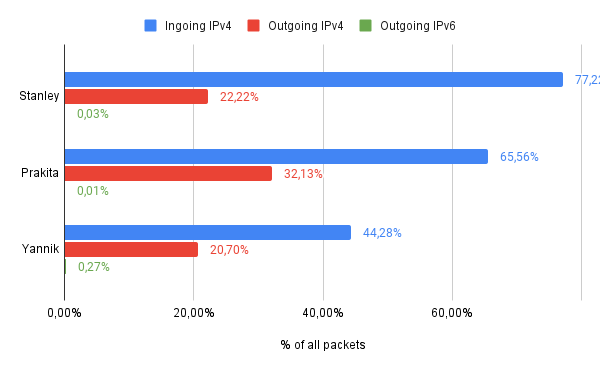

Visualizing the histogram presenting a number of devices used across the data


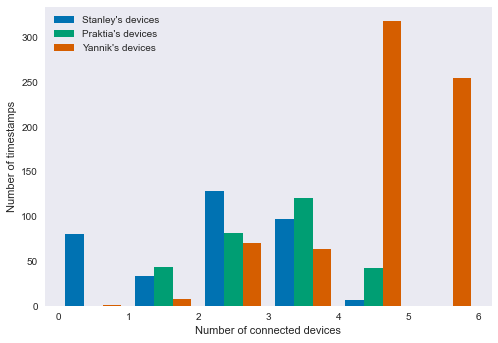

In [84]:
s_dev=ipdata_s['num_devices']
r_dev=ipdata_r['num_devices']
y_dev=ipdata_y['num_devices']
plt.style.use('seaborn-colorblind')
bins=6
plt.pyplot.hist([s_dev, r_dev,y_dev], bins, label=["Stanley's devices", "Praktia's devices", "Yannik's devices"])
plt.pyplot.legend(loc='upper left')
plt.pyplot.xlabel('Number of connected devices')
plt.pyplot.ylabel('Number of timestamps')
plt.pyplot.show()

In this part statistic about encryption types will be retrieved. This data will be visualized using google sheets for better bar plots formating. 

In [10]:
encrdata_s=data_s.drop(labels={"http_using","df_owner"},axis=1)
dict_s={'acc_count':0,'acc_encr':0}
for record in range(encrdata_s.shape[0]) :
    #transposing the single entry so that rows represent different devices
    stamp=pd.DataFrame(encrdata_s.iloc[record]['devices']).transpose()
    num_devices=stamp.shape[0]
    for device in range(num_devices):
        dict_s['acc_count']+=stamp.iloc[device]['total_count']
        dict_s['acc_encr']+=stamp.iloc[device]['total_enc_count']
    for device in range(num_devices):
        device_name=stamp.iloc[device].name
        device_ident=device_name+"_count"
        if(device_ident in dict_s.keys()):
            dict_s[device_ident]+=stamp.iloc[device]['total_count']
        else:
            dict_s[device_ident]=stamp.iloc[device]['total_count']
        for key in stamp.iloc[device].encryption_protocols:
            if(stamp.iloc[device].encryption_protocols[key]!=0):
                ident=device_name+"_encr_"+key
                if(ident in dict_s.keys()):
                    dict_s[ident]+=stamp.iloc[device].encryption_protocols[key]
                else:
                    dict_s[ident]=stamp.iloc[device].encryption_protocols[key]
    
       

In [11]:
encrdata_r=data_r.drop(labels={"http_using","df_owner"},axis=1)
dict_r={'acc_count':0,'acc_encr':0}
for record in range(encrdata_r.shape[0]) :
    #transposing the single entry so that rows represent different devices
    stamp=pd.DataFrame(encrdata_r.iloc[record]['devices']).transpose()
    num_devices=stamp.shape[0]
    for device in range(num_devices):
        dict_r['acc_count']+=stamp.iloc[device]['total_count']
        dict_r['acc_encr']+=stamp.iloc[device]['total_enc_count']
    for device in range(num_devices):
        device_name=stamp.iloc[device].name
        device_ident=device_name+"_count"
        if(device_ident in dict_r.keys()):
            dict_r[device_ident]+=stamp.iloc[device]['total_count']
        else:
            dict_r[device_ident]=stamp.iloc[device]['total_count']
        for key in stamp.iloc[device].encryption_protocols:
            if(stamp.iloc[device].encryption_protocols[key]!=0):
                ident=device_name+"_encr_"+key
                if(ident in dict_r.keys()):
                    dict_r[ident]+=stamp.iloc[device].encryption_protocols[key]
                else:
                    dict_r[ident]=stamp.iloc[device].encryption_protocols[key]
    

    

In [12]:
encrdata_y=data_y.drop(labels={"http_using","df_owner"},axis=1)
dict_y={'acc_count':0,'acc_encr':0}
for record in range(encrdata_y.shape[0]) :
    #transposing the single entry so that rows represent different devices
    stamp=pd.DataFrame(encrdata_y.iloc[record]['devices']).transpose()
    num_devices=stamp.shape[0]
    for device in range(num_devices):
        dict_y['acc_count']+=stamp.iloc[device]['total_count']
        dict_y['acc_encr']+=stamp.iloc[device]['total_enc_count']
    for device in range(num_devices):
        device_name=stamp.iloc[device].name
        device_ident=device_name+"_count"
        if(device_ident in dict_y.keys()):
            dict_y[device_ident]+=stamp.iloc[device]['total_count']
        else:
            dict_y[device_ident]=stamp.iloc[device]['total_count']
        for key in stamp.iloc[device].encryption_protocols:
            if(stamp.iloc[device].encryption_protocols[key]!=0):
                ident=device_name+"_encr_"+key
                if(ident in dict_y.keys()):
                    dict_y[ident]+=stamp.iloc[device].encryption_protocols[key]
                else:
                    dict_y[ident]=stamp.iloc[device].encryption_protocols[key]
    


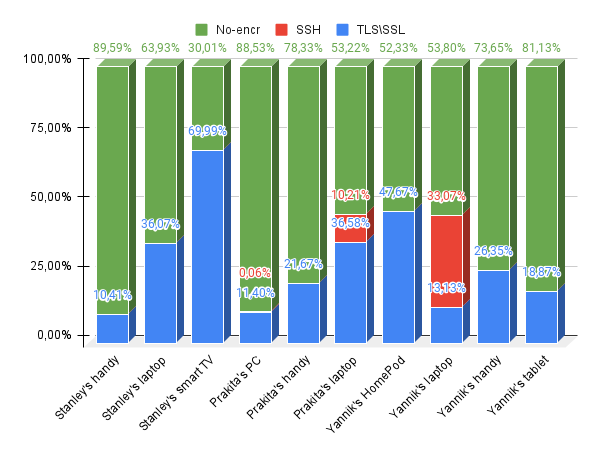

Using the same data additional figure is created using google sheets.

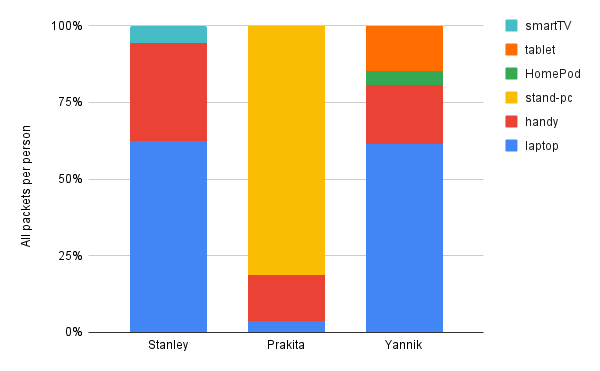